In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#!unzip /content/gdrive/MyDrive/AT2/dataset_42028assg2_14355123.zip -d /content/gdrive/MyDrive/AT222

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: /content/gdrive/MyDrive/AT222/Object_Detection/yolo/train/images/100173.jpg  
  inflating: /content/gdrive/MyDrive/AT222/Object_Detection/yolo/train/images/101084.jpg  
  inflating: /content/gdrive/MyDrive/AT222/Object_Detection/yolo/train/images/101291.jpg  
  inflating: /content/gdrive/MyDrive/AT222/Object_Detection/yolo/train/images/100058.jpg  
  inflating: /content/gdrive/MyDrive/AT222/Object_Detection/yolo/train/images/101315.jpg  
  inflating: /content/gdrive/MyDrive/AT222/Object_Detection/yolo/train/images/100844.jpg  
  inflating: /content/gdrive/MyDrive/AT222/Object_Detection/yolo/train/images/100088.jpg  
  inflating: /content/gdrive/MyDrive/AT222/Object_Detection/yolo/train/images/101313.jpg  
  inflating: /content/gdrive/MyDrive/AT222/Object_Detection/yolo/train/images/101002.jpg  
  inflating: /content/gdrive/MyDrive/AT222/Object_Detection/yolo/train/images/100419.jpg  
  inflating: /content/gdrive/MyDrive/AT222/Object_Detection/yol

In [ ]:
%cd /content/gdrive/MyDrive/AT222

/content/gdrive/MyDrive/AT222


In [ ]:
#!git clone https://github.com/GitarthVaishnav/FasterRCNN42028.git

Cloning into 'FasterRCNN42028'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 124 (delta 51), reused 108 (delta 37), pack-reused 0
Receiving objects: 100% (124/124), 4.28 MiB | 14.55 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [ ]:
%cd FasterRCNN42028/

/content/gdrive/MyDrive/AT222/FasterRCNN42028


In [ ]:
# Install the Requirements
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 96.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 23.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 

In [ ]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: '/content/gdrive/MyDrive/AT222/Object_Detection/pascal/train'
TRAIN_DIR_LABELS: '/content/gdrive/MyDrive/AT222/Object_Detection/pascal/train'
VALID_DIR_IMAGES: '/content/gdrive/MyDrive/AT222/Object_Detection/pascal/valid'
VALID_DIR_LABELS: '/content/gdrive/MyDrive/AT222/Object_Detection/pascal/valid'
TEST_DIR_IMAGES: '/content/gdrive/MyDrive/AT222/Object_Detection/pascal/test'
TEST_DIR_LABELS: '/content/gdrive/MyDrive/AT222/Object_Detection/pascal/test'

# Class names.
CLASSES: [
 '__background__', 'Ready', 'empty_pod', 'germination', 'pod', 'young'
 ]


# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 6

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Overwriting data_configs/custom_data.yaml


In [ ]:
!wandb disabled

W&B disabled.


In [ ]:
!python train.py --config data_configs/custom_data.yaml --epochs 25 --model fasterrcnn_resnet50_fpn_v2 --project-name plant --batch-size 2 --no-mosaic

Not using distributed mode
device cuda
2023-05-19 08:08:56.125701: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 08:08:57.209783: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Creating data loaders
Number of training samples: 1057
Number of validation samples: 226

Building model from scratch...
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100% 167M/167M [00:03<00:00, 53.1MB/s]
Layer (type:depth-idx)                             Output Shape              Param #
FasterRCNN                                         [100, 4]                  --
├─Generalized

In [ ]:
import matplotlib.pyplot as plt
import glob as glob

In [ ]:
results_dir_path = '/content/gdrive/MyDrive/AT222/FasterRCNN42028/outputs/training/plant'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")
print(valid_images)
for i in range(2):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [ ]:
# No verbose mAP.
!python eval.py --weights outputs/training/plant/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100% 167M/167M [00:03<00:00, 47.5MB/s]
/content/gdrive/MyDrive/AT222/Object_Detection/pascal/test/100234.xml not found...
Removing 100234.jpg image
/content/gdrive/MyDrive/AT222/Object_Detection/pascal/test/100613.xml not found...
Removing 100613.jpg image
/content/gdrive/MyDrive/AT222/Object_Detection/pascal/test/100769.xml not found...
Removing 100769.jpg image
/content/gdrive/MyDrive/AT222/Object_Detection/pascal/test/100851.xml not found...
Removing 100851.jpg image
/content/gdrive/MyDrive/AT222/Object_Detection/pascal/test/101114.xml not found...
Removing 101114.jpg image
/content/gdrive/MyDrive/AT222/Object_Detection/pascal/test/101119.xml not found...
Removing 101119.jpg image
/content/gdrive/MyDrive/AT222/Object_Detection/pascal/test/101136.xml not found...
Removing 101136.jpg image
/content/gdrive/MyD

In [ ]:
# Verbose mAP.
!python eval.py --weights outputs/training/plant/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

/content/gdrive/MyDrive/AT222/Object_Detection/pascal/test/100234.xml not found...
Removing 100234.jpg image
/content/gdrive/MyDrive/AT222/Object_Detection/pascal/test/100613.xml not found...
Removing 100613.jpg image
/content/gdrive/MyDrive/AT222/Object_Detection/pascal/test/100769.xml not found...
Removing 100769.jpg image
/content/gdrive/MyDrive/AT222/Object_Detection/pascal/test/100851.xml not found...
Removing 100851.jpg image
/content/gdrive/MyDrive/AT222/Object_Detection/pascal/test/101114.xml not found...
Removing 101114.jpg image
/content/gdrive/MyDrive/AT222/Object_Detection/pascal/test/101119.xml not found...
Removing 101119.jpg image
/content/gdrive/MyDrive/AT222/Object_Detection/pascal/test/101136.xml not found...
Removing 101136.jpg image
/content/gdrive/MyDrive/AT222/Object_Detection/pascal/test/101146.xml not found...
Removing 101146.jpg image
/content/gdrive/MyDrive/AT222/Object_Detection/pascal/test/101239.xml not found...
Removing 101239.jpg image
/content/gdrive/MyD

In [ ]:
!python inference.py --input /content/gdrive/MyDrive/AT222/Object_Detection/pascal/test/100011.jpg --weights outputs/training/plant/best_model.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Average FPS: 4.491


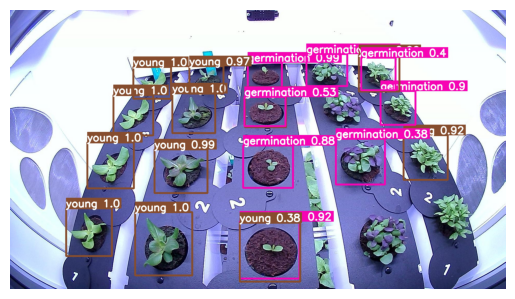

In [ ]:
image = plt.imread('/content/gdrive/MyDrive/AT222/FasterRCNN42028/outputs/inference/res_6/100011.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()